# Analysis Notebook

In this notebook I will perform an Exploratory Data Analysis (EDA), statistical checks and feature selection with a tree-based ML algorithm.

## Table of Contents
**1. [Exploratory Data Analysis](#analysis)**

**2. [Statistical Checks](#stats)**

**3. [Feature Selection](#select)**

In [1]:
# Imports and useful functions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from matplotlib.colors import ListedColormap
%matplotlib inline
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

#To display all columns/rows in the dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

def load_data(route, name):
    path = os.path.join(route, name)    
    return pd.read_csv(path, sep = ';',index_col='Date')

In [2]:
# Load the data

df=load_data('data','dataset.csv')

## 1. Exploratory Data Analysis <a id="analysis"></a>

In this section, I will mainly focus on:
- **Pre-processing** of the data: mainly NaNs.
- Plot the different features to check distributions.

In [3]:
df.tail()

,Close,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,returns,^BSESN,^GSPC,^HSI,^N225,^NDX,^NYA,AAPL,AMZN,CRM,CSCO,GOOGL,HPQ,IBM,INTC,NOK,NVDA,ORCL,QCOM,RELIANCE.NS,SAP,HKD=X,INR=X,USDEUR=X,USDJPY=X,sentiment
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-06-23,51.910000,50.624286,51.436190,51.213619,50.987704,-0.225914,1.036327,53.508845,49.363536,51.585109,0.018043,27002.220703,2113.320068,20868.339844,16238.349609,4467.479980,10641.169922,96.099998,722.080017,82.279999,29.219999,714.869995,12.95,155.350006,32.990002,5.70,48.490002,40.830002,55.549999,490.225006,81.070000,7.75722,67.421997,0.88275,104.650002,-0.407320
2016-06-24,49.830002,50.644286,51.327143,51.111128,50.809596,-0.301532,1.086432,53.500007,49.154278,50.415038,-0.040069,26397.710938,2037.410034,20259.130859,14952.019531,4285.700195,10183.509766,93.400002,698.960022,78.459999,27.750000,685.200012,12.26,146.589996,31.549999,5.21,45.730000,39.230000,52.119999,475.725006,73.940002,7.75670,67.241997,0.88308,104.896004,-0.351692
2016-06-27,48.430000,50.364286,51.162381,50.912526,50.443505,-0.469022,1.232423,53.627228,48.697534,49.091679,-0.028096,26402.960938,2000.540039,20227.300781,15309.209961,4201.049805,9973.540039,92.040001,691.359985,76.070000,27.309999,681.140015,11.55,143.500000,30.719999,5.08,45.240002,38.480000,51.139999,477.825012,72.019997,7.76002,67.876999,0.90613,102.126999,-0.332867
2016-06-28,49.439999,50.265714,51.025238,50.803450,50.289119,-0.514331,1.200930,53.427099,48.623377,49.323892,0.020855,26524.550781,2036.089966,20172.460938,15323.139648,4290.470215,10161.160156,93.589996,707.950012,77.550003,27.790001,691.260010,11.79,145.699997,31.190001,5.36,45.900002,39.130001,52.509998,478.899994,73.849998,7.75955,67.920998,0.90785,101.811996,-0.302838
2016-06-29,50.540001,50.332857,50.908095,50.783935,50.327716,-0.456219,1.114148,53.136391,48.679800,50.134631,0.022249,26740.390625,2070.770020,20436.119141,15566.830078,4364.740234,10350.530273,94.400002,715.599976,79.000000,28.260000,695.190002,12.18,148.460007,31.930000,5.54,46.650002,40.549999,53.549999,483.450012,75.099998,7.75830,67.705002,0.90302,102.700996,-0.400221


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1987 entries, 2008-08-08 to 2016-06-29
Data columns (total 36 columns):
Close          1987 non-null float64
ma7            1981 non-null float64
ma21           1967 non-null float64
26ema          1987 non-null float64
12ema          1987 non-null float64
MACD           1987 non-null float64
20sd           1968 non-null float64
upper_band     1967 non-null float64
lower_band     1967 non-null float64
ema            1987 non-null float64
returns        1986 non-null float64
^BSESN         1873 non-null float64
^GSPC          1987 non-null float64
^HSI           1893 non-null float64
^N225          1863 non-null float64
^NDX           1987 non-null float64
^NYA           1987 non-null float64
AAPL           1987 non-null float64
AMZN           1987 non-null float64
CRM            1987 non-null float64
CSCO           1987 non-null float64
GOOGL          1987 non-null float64
HPQ            1987 non-null float64
IBM            1987 non-null flo

In [5]:
df.isnull().sum()

Close            0
ma7              6
ma21            20
26ema            0
12ema            0
MACD             0
20sd            19
upper_band      20
lower_band      20
ema              0
returns          1
^BSESN         114
^GSPC            0
^HSI            94
^N225          124
^NDX             0
^NYA             0
AAPL             0
AMZN             0
CRM              0
CSCO             0
GOOGL            0
HPQ              0
IBM              0
INTC             0
NOK              0
NVDA             0
ORCL             0
QCOM             0
RELIANCE.NS    108
SAP              0
HKD=X            3
INR=X           14
USDEUR=X        13
USDJPY=X        13
sentiment        0
dtype: int64

Missing values:
- **Indices**: BSE SENSEX
- **Currency Pairs**
- **Technical Indicators** that depend on previous days
- **Companies**: Reliance Industries

Will use `back fill` to input the last valid observation forward to the next date.

In [3]:
df = df.fillna(method='bfill')

df.isnull().sum()

Close          0
ma7            0
ma21           0
26ema          0
12ema          0
MACD           0
20sd           0
upper_band     0
lower_band     0
ema            0
returns        0
^BSESN         0
^GSPC          0
^HSI           0
^N225          0
^NDX           0
^NYA           0
AAPL           0
AMZN           0
CRM            0
CSCO           0
GOOGL          0
HPQ            0
IBM            0
INTC           0
NOK            0
NVDA           0
ORCL           0
QCOM           0
RELIANCE.NS    0
SAP            0
HKD=X          0
INR=X          0
USDEUR=X       0
USDJPY=X       0
sentiment      0
dtype: int64

I will start by plotting Microsoft's **exponential price** to see the **trends**:

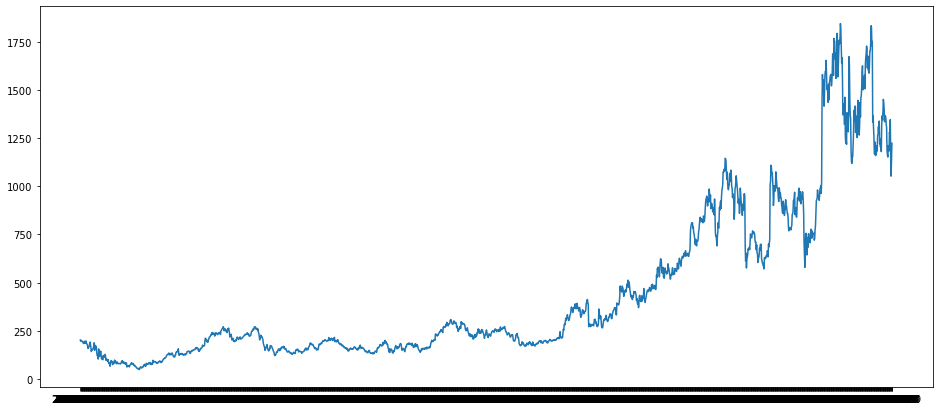

In [7]:
y_exp = np.exp(df['Close']**0.5)

plt.figure(figsize=(16,7))
plt.plot(y_exp)

Following, will plot the **percentage change** to see the daily returns in the price of the stock:

count    1986.000000
mean        0.046307
std         1.837752
min       -11.713099
25%        -0.819189
50%         0.000000
75%         0.886714
max        18.604651
Name: Close, dtype: float64

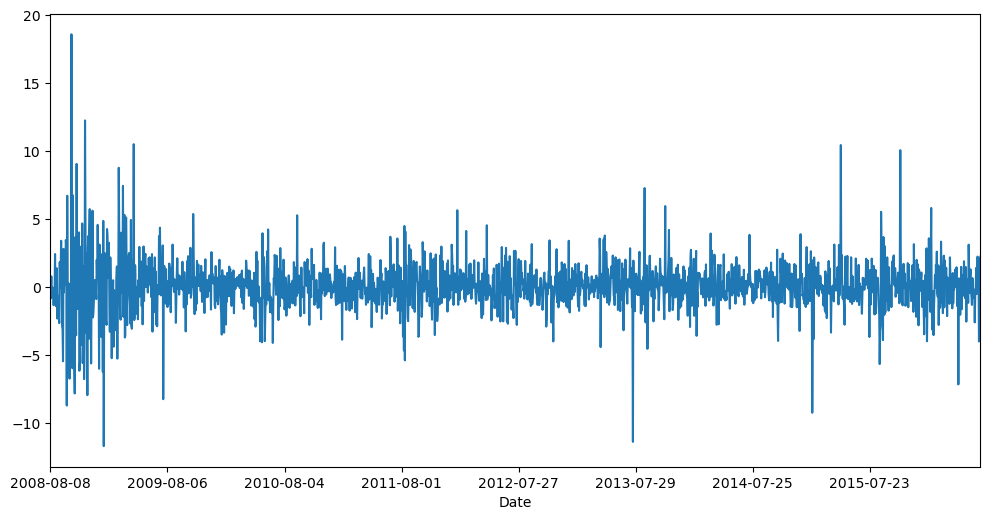

In [8]:
y_perc = df['Close'].pct_change()*100

plt.figure(figsize=(12, 6), dpi=100)
y_perc.plot()

y_perc.describe()

Plotting the **technical indicators** for the last year:

In [9]:
def plot_technical_indicators(dataset, last_days):
    plt.figure(figsize=(16, 10), dpi=100)
    #shape_0 = dataset.shape[0]
    #xmacd_ = shape_0-last_days
    
    # Set the index to -last_days value
    dataset = dataset.iloc[-last_days:, :]
    
    plt.subplot(2, 1, 1)
    plt.plot(dataset['ma7'],label='MA 7', color='g',linestyle='--')
    plt.plot(dataset['Close'],label='Closing Price', color='b')
    plt.plot(dataset['ma21'],label='MA 21', color='r',linestyle='--')
    plt.plot(dataset['upper_band'],label='Upper Band', color='c')
    plt.plot(dataset['lower_band'],label='Lower Band', color='c')
    plt.title('Technical indicators for Microsoft - last {} days.'.format(last_days))
    plt.ylabel('USD')
    plt.legend()

    plt.legend()
    plt.show()

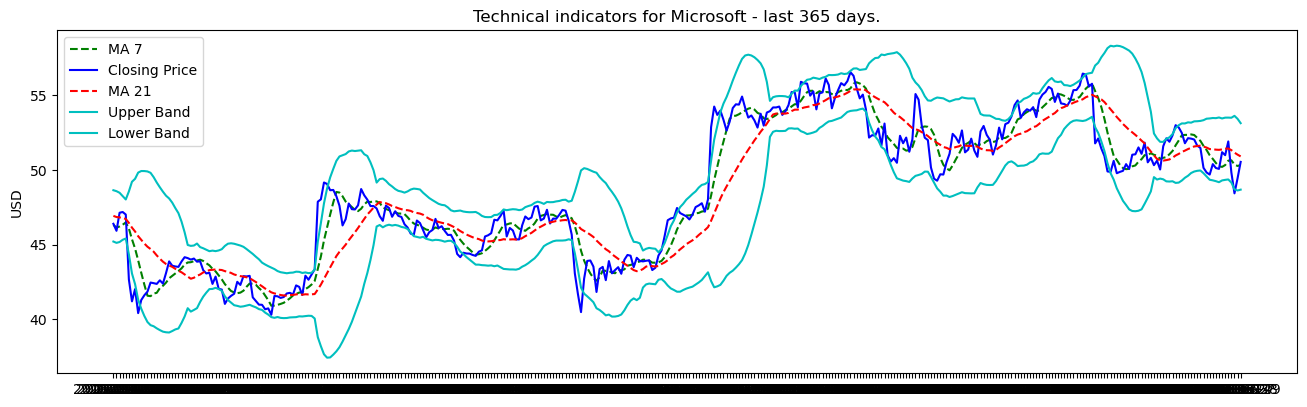

In [10]:
plot_technical_indicators(df, 365)

Comparing **Microsoft** with the other **tech giants**. In order to see relationships, I will divide the values by the first data point in order to scale the data:

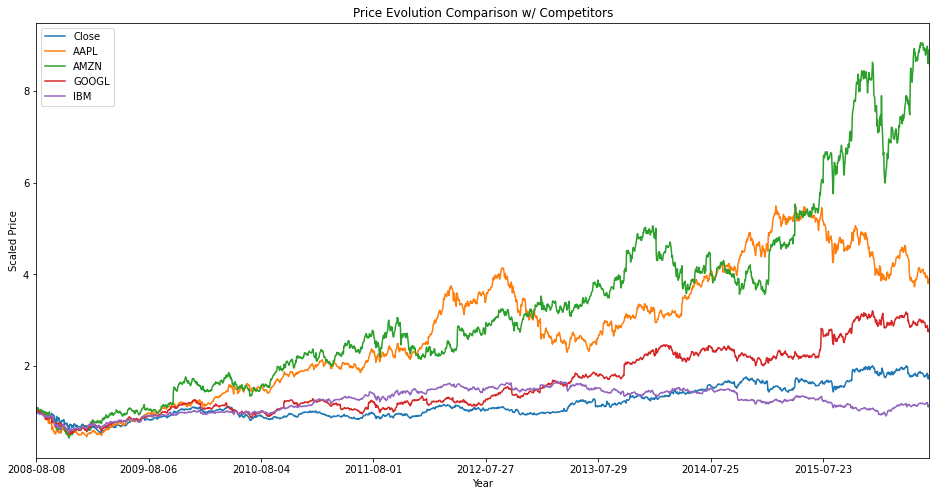

In [11]:
giants=df[['Close','AAPL','AMZN','GOOGL','IBM']]

histprice = giants/giants.iloc[0]

plt.figure(figsize=(16, 8))

for i, col in enumerate(histprice.columns):
    histprice[col].plot()

plt.title('Price Evolution Comparison w/ Competitors')
plt.xlabel('Year')
plt.ylabel('Scaled Price')
plt.legend(histprice.columns)

Comparing **Microsoft** with the **indexes**. Same procedure:

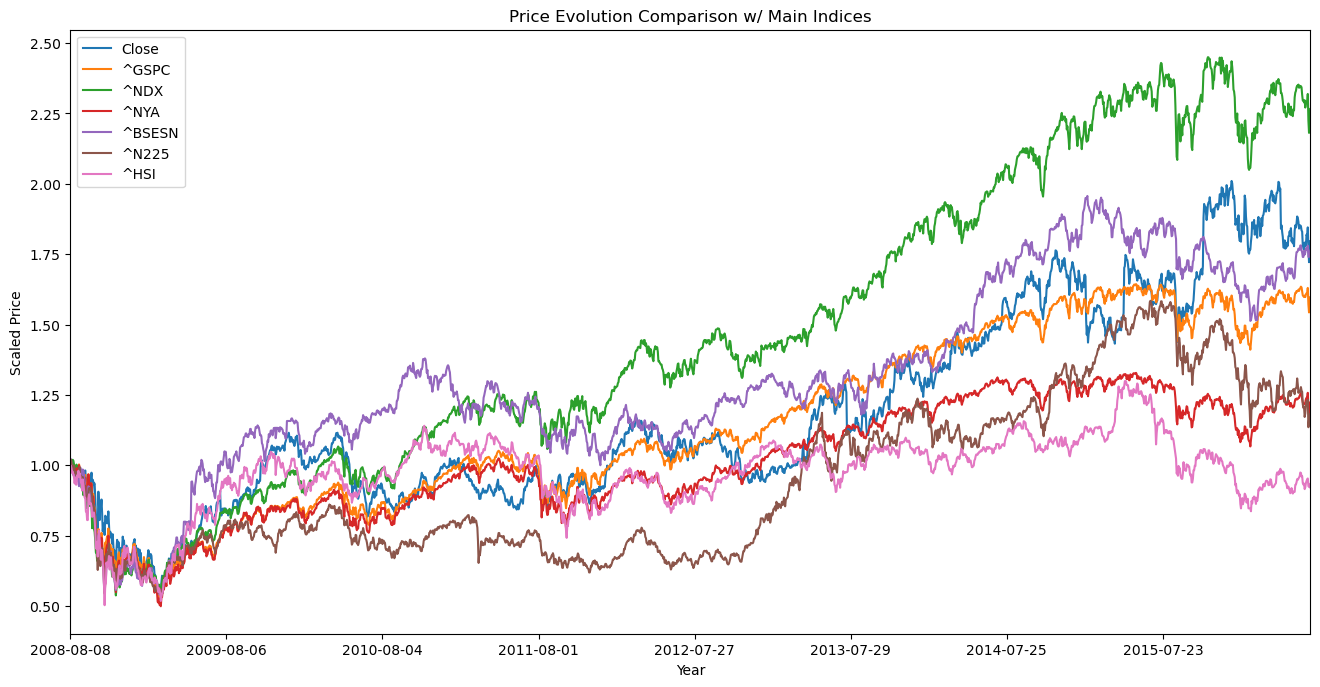

In [12]:
idxs=df[['Close','^GSPC','^NDX','^NYA','^BSESN','^N225','^HSI']]

scaled_idxs = idxs/idxs.iloc[0]

plt.figure(figsize=(16, 8), dpi=100)

for i, col in enumerate(scaled_idxs.columns):
    scaled_idxs[col].plot()

plt.title('Price Evolution Comparison w/ Main Indices')
plt.xlabel('Year')
plt.ylabel('Scaled Price')
plt.legend(scaled_idxs.columns)

Finally, the same with the **currency pairs**:

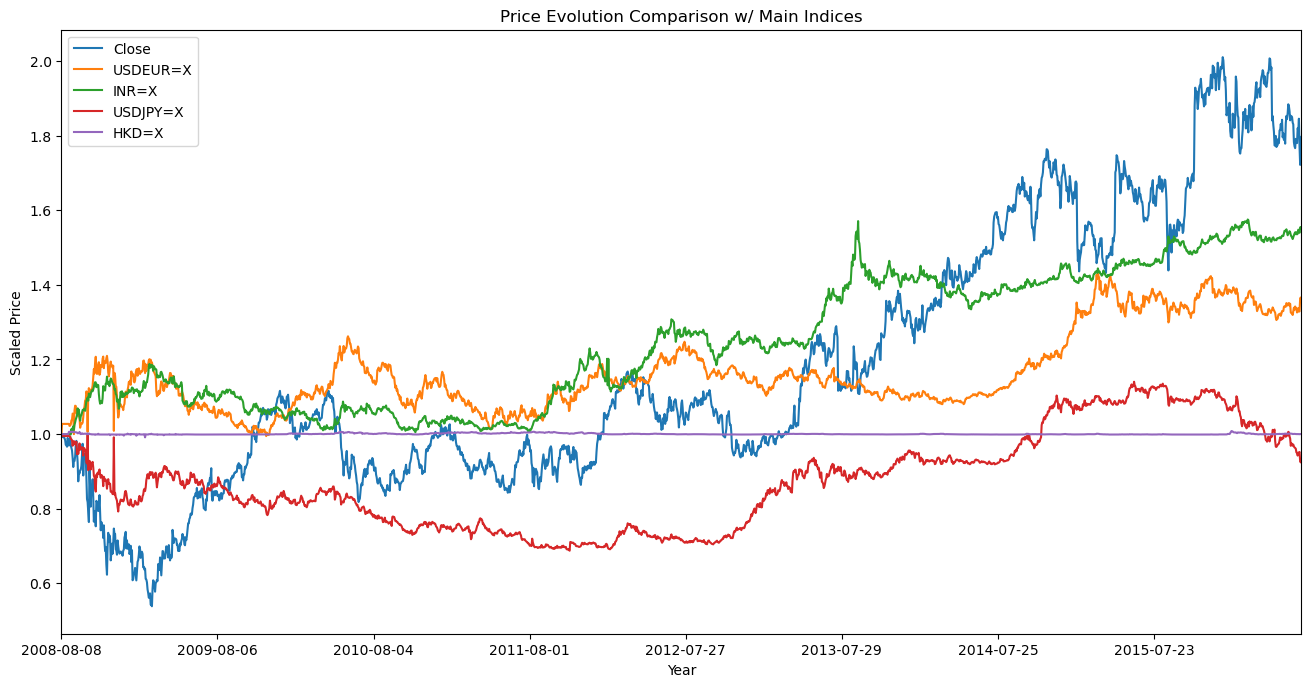

In [13]:
pairs=df[['Close','USDEUR=X','INR=X','USDJPY=X','HKD=X']]

scaled_pairs = pairs/pairs.iloc[0]

plt.figure(figsize=(16, 8), dpi=100)

for i, col in enumerate(scaled_pairs.columns):
    scaled_pairs[col].plot()

plt.title('Price Evolution Comparison w/ Main Indices')
plt.xlabel('Year')
plt.ylabel('Scaled Price')
plt.legend(scaled_pairs.columns)

Realized that the **Hong Kong Dollar follows a linked exchange rate with the USD** since 1983: fixed rate of HKD7.80 = USD1

Will drop that feature:

In [4]:
df.drop(['HKD=X'],axis=1,inplace=True)

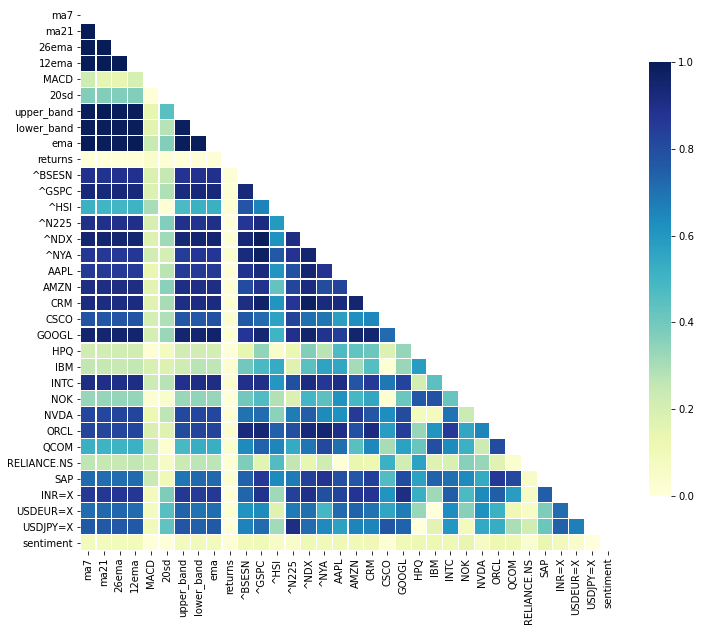

In [15]:
# Compute the correlation matrix
corr = np.abs(df.drop(['Close'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

We see **strong correlation** between most of the **Technical Indicators**, the **Indexes** and some of the **correlated assets**. 

I will now check how the correlation might be if I use the `pct_change()` instead of the price for the X variables:

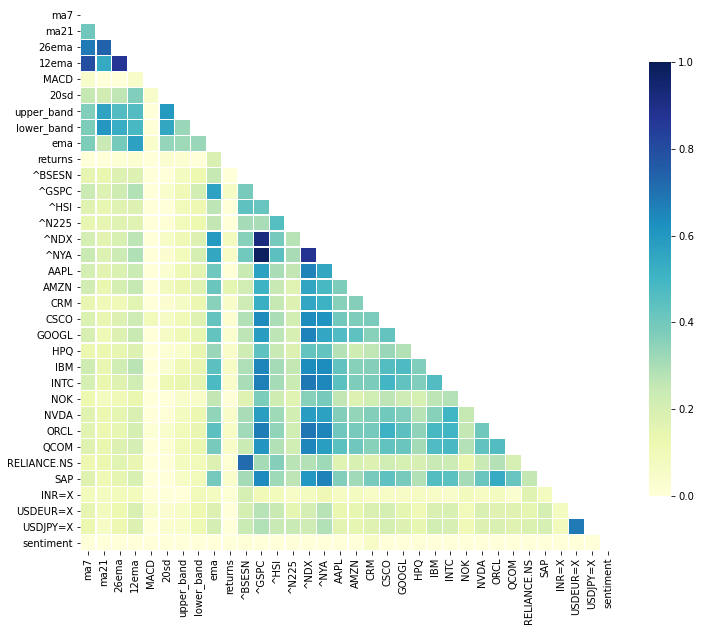

In [16]:
# Compute the correlation matrix
df_corr=df.drop(['Close'], axis=1)
series=df_corr.pct_change()*100
corr = np.abs(series).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Three of the **Indexes (Nasdaq, NYSE and SP500)** are **highly correlated**. I will only keep the Nasdaq:

In [5]:
df.drop(['^GSPC','^NYA'],axis=1,inplace=True)

I will now check the distributions of the tech giants by calculating the returns:

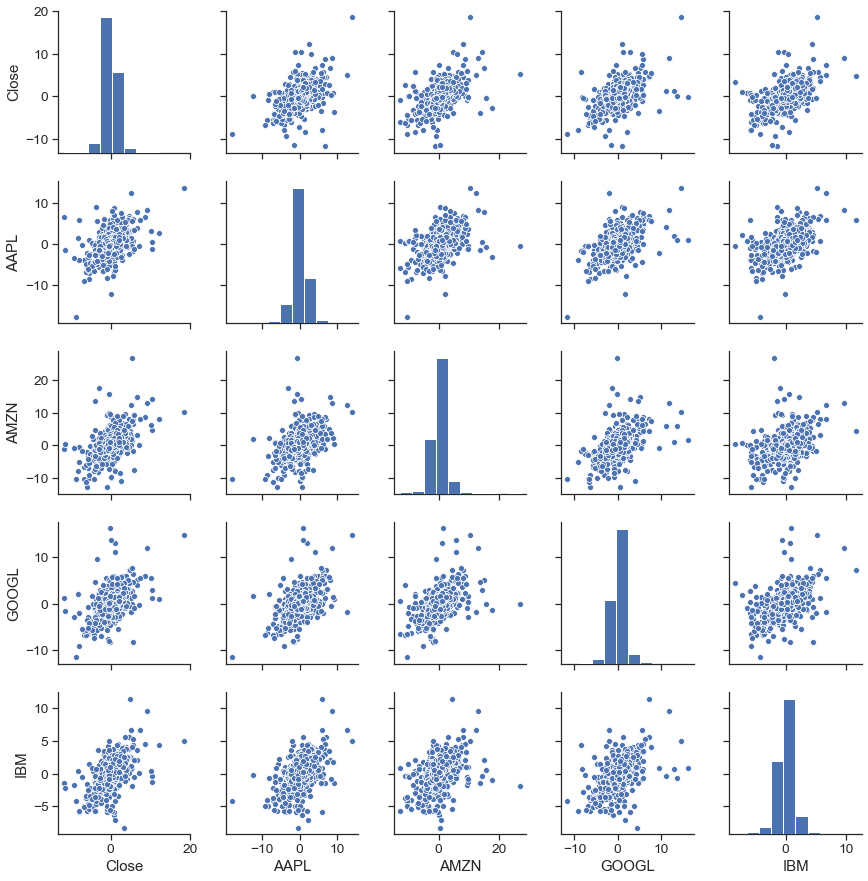

In [18]:
perc_change_giants = giants.pct_change()*100

sns.set(style = 'ticks',font_scale=1.25)
sns.pairplot(perc_change_giants)

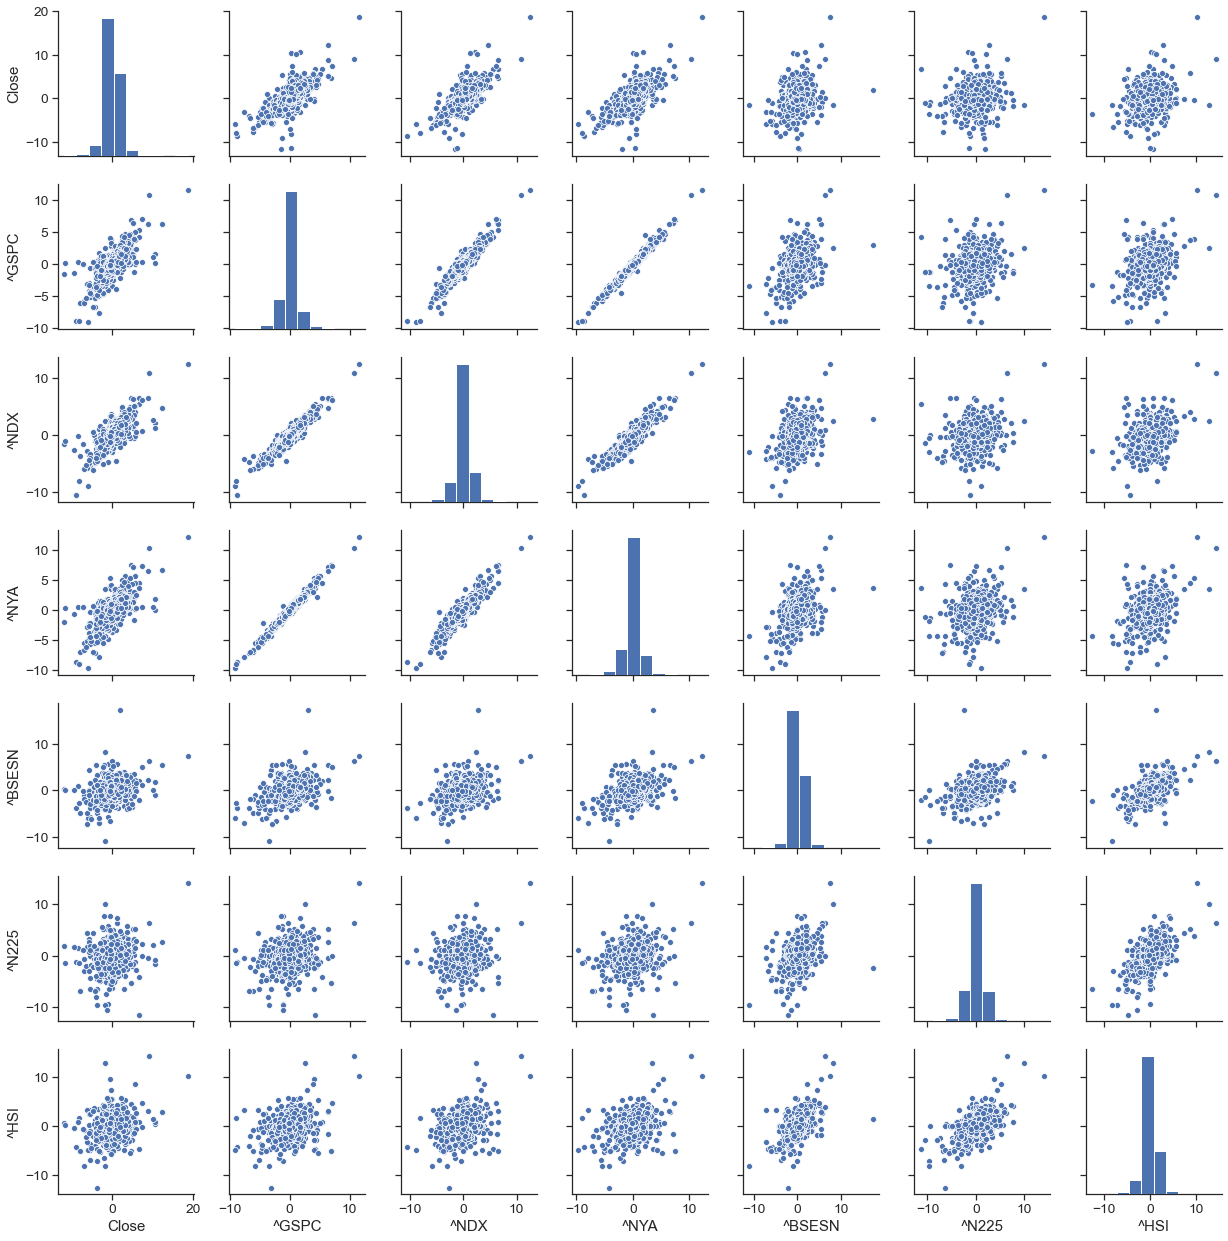

In [19]:
perc_change_idxs = idxs.pct_change()*100

sns.set(style = 'ticks',font_scale=1.25)
sns.pairplot(perc_change_idxs)

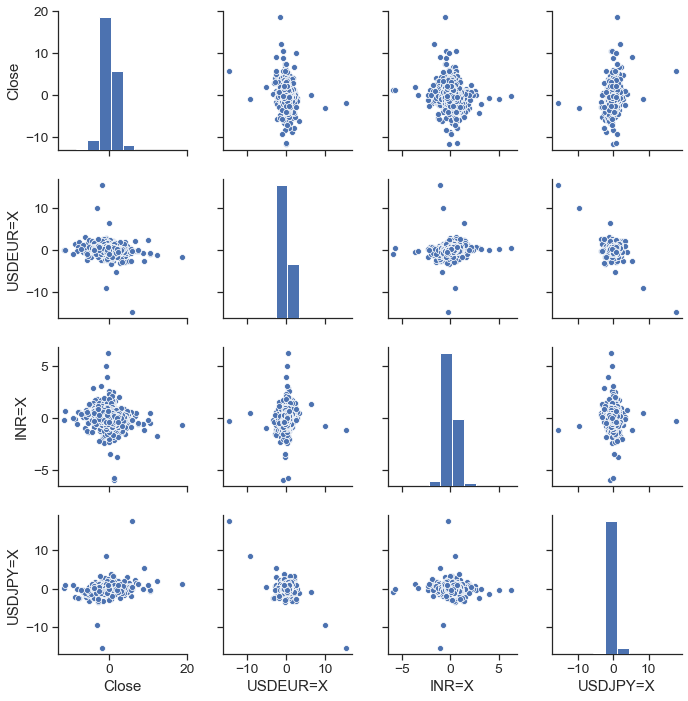

In [20]:
pairs=pairs.drop(['HKD=X'],axis=1)

perc_change_pairs = pairs.pct_change()*100

sns.set(style = 'ticks',font_scale=1.25)
sns.pairplot(perc_change_pairs)

## 2. Statistical Checks <a id="stats"></a>

#### 1. Heteroscedasticity: 
`What you have in your data when the conditional variance is not constant, understanding conditional variance as the variability that you see in y (dependant variable) for each value of t (time period).`

Given the nature of most of the variables in the dataset (stock prices, indexes and currency pairs), and after seeing the plots in the EDA section, we can confirm that most of the features are nonlinear and heteroscedastic. 

One way of solving this problem is to log-transform the y variable to lessen some of the heteroscedasticity and achieve linearity.

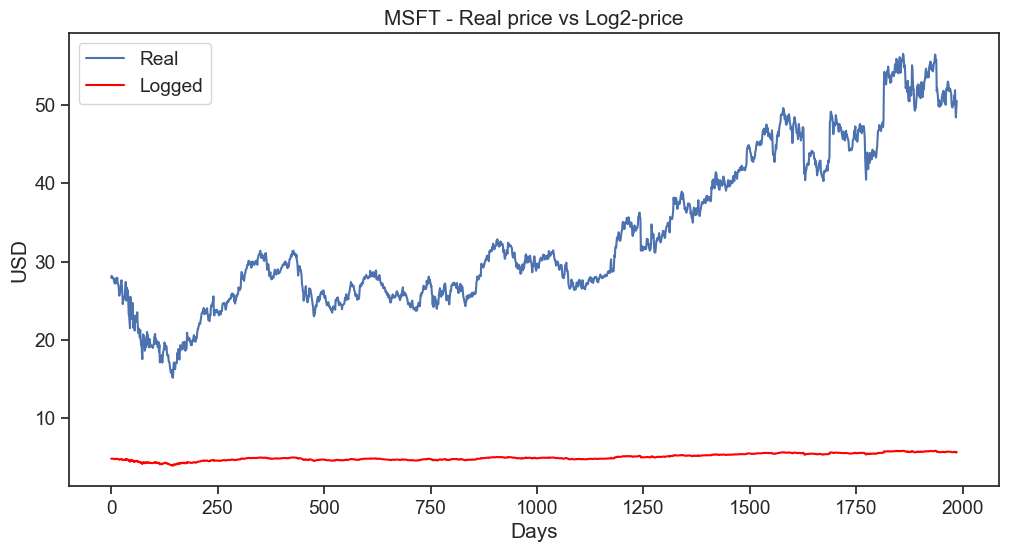

In [21]:
series = df['Close'].values
log_series = np.log2(df['Close']).values

plt.figure(figsize=(12, 6), dpi=100)
plt.plot(series, label='Real')
plt.plot(log_series, color='red', label='Logged')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('MSFT - Real price vs Log2-price')
plt.legend()
plt.show()

#### 2. Multicollinearity:
`Multicollinearity is given when two or more independent variables are highly correlated with one another in a regression model`.

The Variance Inflation Factor (VIF) will easily let us see the multicollinearity of X. VIF starts at 1 and has no upper limit. 

- VIF = 1, no correlation between the independent variable and the other variables
- VIF > 20, high multicollinearity between this independent variable and the others

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

X = df.drop(['Close'],axis=1)

calc_vif(X)

,variables,VIF
0,ma7,8.079373e+04
1,ma21,inf
2,26ema,inf
3,12ema,inf
4,MACD,inf
5,20sd,1.101571e+05
6,upper_band,inf
7,lower_band,inf
8,ema,1.117584e+04
9,returns,1.293718e+00


These results indicate a really high Multicollinearity between variables. This means that collinear predictors can indicate how well the entire bundle of predictors predicts the outcome variable, but it may not give valid results about any individual predictor, or about which predictors are redundant with respect to others.

Therefore, instead of looking at the price itself for the X variables, I will grab the percentage change (`pct_change()`) for all the correlated assets and indexes.

In [6]:
corr_assets=['AAPL','AMZN','CRM','CSCO','GOOGL','HPQ','IBM','INTC','NOK','NVDA','ORCL','QCOM','RELIANCE.NS','SAP',
             '^BSESN','^HSI','^N225','^NDX']

In [7]:
df=df.apply(lambda x: x.pct_change()*100 if x.name in corr_assets else x)

In [25]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

X = df.drop(['Close','ma7','26ema','12ema','MACD','upper_band','lower_band','ema','INR=X','USDJPY=X'],axis=1)
X = X.dropna(axis=0)

calc_vif(X)

,variables,VIF
0,ma21,20.333040
1,20sd,4.791107
2,returns,2.607347
3,^BSESN,3.298423
4,^HSI,1.851013
5,^N225,1.502773
6,^NDX,20.781619
7,AAPL,2.804252
8,AMZN,1.958975
9,CRM,1.943909


By dropping all the Technical Indicators except the one that it's probably going to be crucial (Moving Average 21), and some of the assets/indexes/pairs showing the highest Multicollinearity, we achieve this point at which we can be almost assured that the data does not imply a huge Multicollinearity.

Nevertheless, I will only keep one of the 3 highest VIF values, since the maximum threshold should be between 10 and 20. I will keep the Nasdaq index and drop both MA21 and the USD/EUR pair.

#### 3. Autocorrelation

`Autocorrelation is a mathematical representation of the degree of similarity between a given time series and a lagged version of itself over successive time intervals.` [[Source]](https://www.investopedia.com/terms/a/autocorrelation.asp#:~:text=Autocorrelation%20represents%20the%20degree%20of,itself%20over%20successive%20time%20intervals.&text=An%20autocorrelation%20of%20%2B1%20represents%20a%20perfect%20positive%20correlation%2C%20while,represents%20a%20perfect%20negative%20correlation.)

I will plot the **AutoCorrelation Function (ACF)** of the target variable, which will calculate the correlation between observations and their previous time steps (lags). In other words, it describes how well the present value of the series is related with its past values.

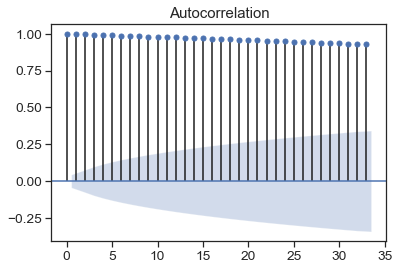

In [26]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['Close'])
plt.show()

The cone represents the 95% confidence interval, and all the values outside of the area are very likely a correlation, not a satistical causality.

Furthermore, the **Partial AutoCorrelation Function (PACF)** will remove the relationships of intervening observations at shorter lags.

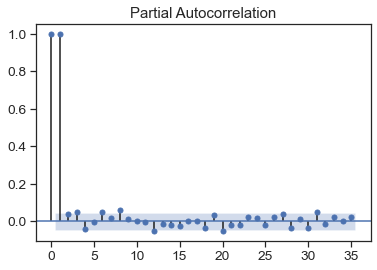

In [27]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df['Close'], lags=35)
plt.show()

## 3. Feature Selection <a id="select"></a>

In this section, I will use a tree-based ML algorithm, XGBoost, in order to check the feature importance of all the variables I am using until the moment.

I will do 4 separate approaches:

1. **Technical indicators**

2. **Correlated Assets**

3. **Indexes**

4. **Currency Pairs**

### 3.1. Technical Indicators

In [23]:
df_TI=df[['Close','ma7','ma21','26ema','12ema','MACD','20sd','upper_band','lower_band']]

y=df_TI['Close']
X=df_TI.iloc[:, 1:]

train_length=int(X.shape[0]*0.8)

X_train=X.iloc[:train_length]
X_test=X.iloc[train_length:]

y_train=y.iloc[:train_length]
y_test=y.iloc[train_length:]

In [24]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

xg_reg = xgb.XGBRegressor(gamma=0.0,
                          n_estimators=4000,
                          colsample_bytree=1,
                          learning_rate=0.1,
                          random_state=123)

xg_reg.fit(X_train,y_train)

xg_mse_train = mean_squared_error(y_train, xg_reg.predict(X_train))
xg_mse_test = mean_squared_error(y_test, xg_reg.predict(X_test))

print("MSE XGBoost (train): {:.4f}".format(xg_mse_train))
print("MSE XGBoost (test): {:.4f}".format(xg_mse_test))

MSE XGBoost (train): 0.0000
MSE XGBoost (test): 14.5040


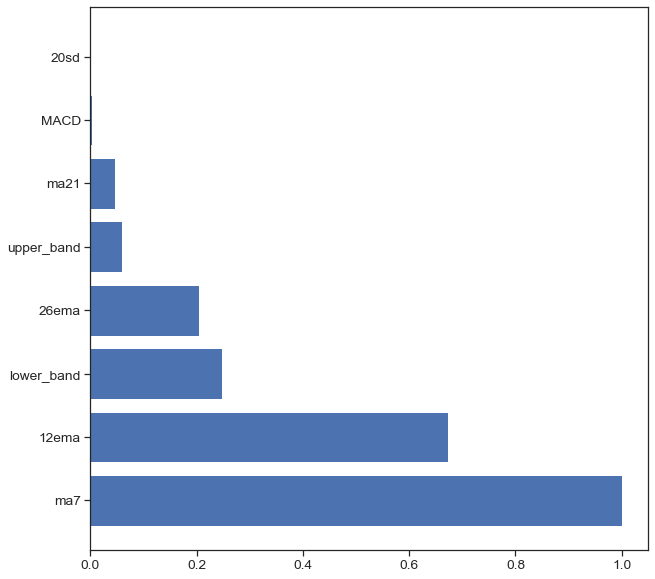

In [25]:
importances = xg_reg.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

feature_names_test=df_TI.columns[1:]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names_test[indices])
plt.show()

### 3.2. Correlated Assets

In [8]:
df_assets=df[['Close','AAPL','AMZN','CRM','CSCO','GOOGL','HPQ','IBM','INTC','NOK','NVDA','ORCL','QCOM','RELIANCE.NS','SAP']]

y=df_assets['Close']
X=df_assets.iloc[:, 1:]

train_length=int(X.shape[0]*0.8)

X_train=X.iloc[:train_length]
X_test=X.iloc[train_length:]

y_train=y.iloc[:train_length]
y_test=y.iloc[train_length:]

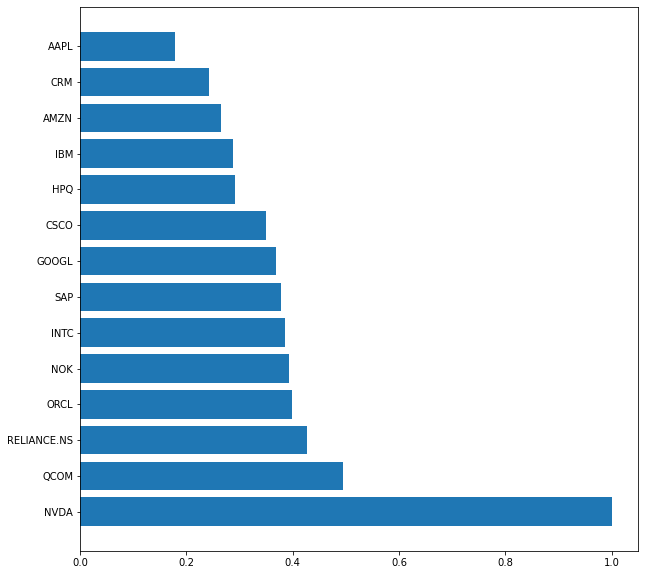

In [12]:
xg_reg = xgb.XGBRegressor(gamma=0.0,
                          n_estimators=2000,
                          colsample_bytree=1,
                          learning_rate=0.1,
                          random_state=123)

xg_reg.fit(X_train,y_train)

importances = xg_reg.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

feature_names_test=df_assets.columns[1:]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names_test[indices])
plt.show()

### 3.3. Indexes

In [14]:
df_idxs=df[['Close','^BSESN','^HSI','^N225','^NDX']]

y=df_idxs['Close']
X=df_idxs.iloc[:, 1:]

train_length=int(X.shape[0]*0.8)

X_train=X.iloc[:train_length]
X_test=X.iloc[train_length:]

y_train=y.iloc[:train_length]
y_test=y.iloc[train_length:]

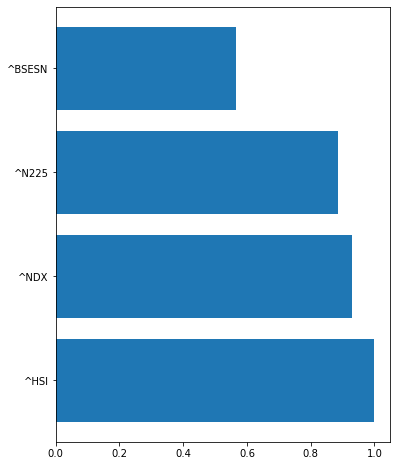

In [16]:
xg_reg = xgb.XGBRegressor(gamma=0.0,
                          n_estimators=4000,
                          colsample_bytree=1,
                          learning_rate=0.1,
                          random_state=123)

xg_reg.fit(X_train,y_train)

importances = xg_reg.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

feature_names_test=df_idxs.columns[1:]

plt.figure(figsize=(6,8))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names_test[indices])
plt.show()

### 3.4. Currency Pairs

In [17]:
df_pairs=df[['Close','INR=X','USDEUR=X','USDJPY=X']]

y=df_pairs['Close']
X=df_pairs.iloc[:, 1:]

train_length=int(X.shape[0]*0.8)

X_train=X.iloc[:train_length]
X_test=X.iloc[train_length:]

y_train=y.iloc[:train_length]
y_test=y.iloc[train_length:]

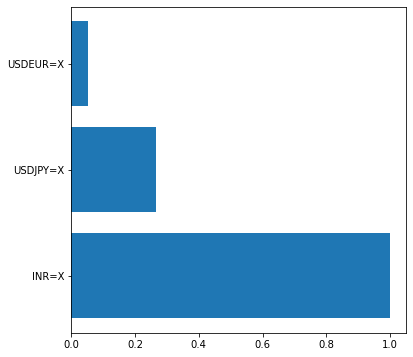

In [19]:
xg_reg = xgb.XGBRegressor(gamma=0.0,
                          n_estimators=2000,
                          colsample_bytree=1,
                          learning_rate=0.1,
                          random_state=123)

xg_reg.fit(X_train,y_train)

importances = xg_reg.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

feature_names_test=df_pairs.columns[1:]

plt.figure(figsize=(6,6))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names_test[indices])
plt.show()

At some point, all the features seem to be important and removing any of them might mean a higher error in our models.

Nevertheless, I will drop the features that presented the highest Multicollinearity during the VIF test in order to improve the quality of the data.

In [28]:
df=df.drop(['ma7','ma21','26ema','12ema','MACD','upper_band',
            'lower_band','ema','INR=X','USDJPY=X','USDEUR=X'],
            axis=1)
df.head()

,Close,20sd,returns,^BSESN,^HSI,^N225,^NDX,AAPL,AMZN,CRM,CSCO,GOOGL,HPQ,IBM,INTC,NOK,NVDA,ORCL,QCOM,RELIANCE.NS,SAP,sentiment
Date,,,,,,,,,,,,,,,,,,,,,,
2008-08-08,28.129999,0.616415,-0.008176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.519771
2008-08-11,27.900000,0.616415,-0.008176,2.215873,-0.118213,1.993407,0.778723,2.365083,9.414972,1.207076,1.525777,1.177756,-0.196415,-1.715705,0.619066,-0.073884,2.090905,-1.870751,-2.577878,3.261746,-0.657890,-0.136720
2008-08-12,28.120001,0.616415,0.007885,-1.882040,-0.999340,-0.947892,-0.008244,1.826461,-0.953566,-0.156184,-0.487412,0.353404,-0.109339,-1.090045,0.574247,-1.774490,-1.424754,-0.779897,-0.385886,0.946136,-0.174281,-0.301171
2008-08-13,27.910000,0.616415,-0.007468,-0.782335,-1.606081,-2.108826,0.048946,1.454199,-0.641831,-1.663820,-0.775512,-0.513320,-0.153242,0.463186,-1.631320,-2.634546,10.749779,0.480352,2.176721,-0.442901,0.034917,-0.615661
2008-08-14,27.910000,0.616415,0.000000,-2.444428,0.466769,-0.508713,1.151378,0.011155,1.545733,-2.791034,1.480875,1.091938,-0.241170,0.906200,0.995024,0.309238,6.035887,0.782270,1.733163,-2.574065,0.069810,-0.399188


In [29]:
from pathlib import Path

project_dir = Path.cwd().parent
data_path=project_dir/'stock_prediction'/'data'/'final_dataset.csv'

df.to_csv(data_path, sep=';', decimal='.')